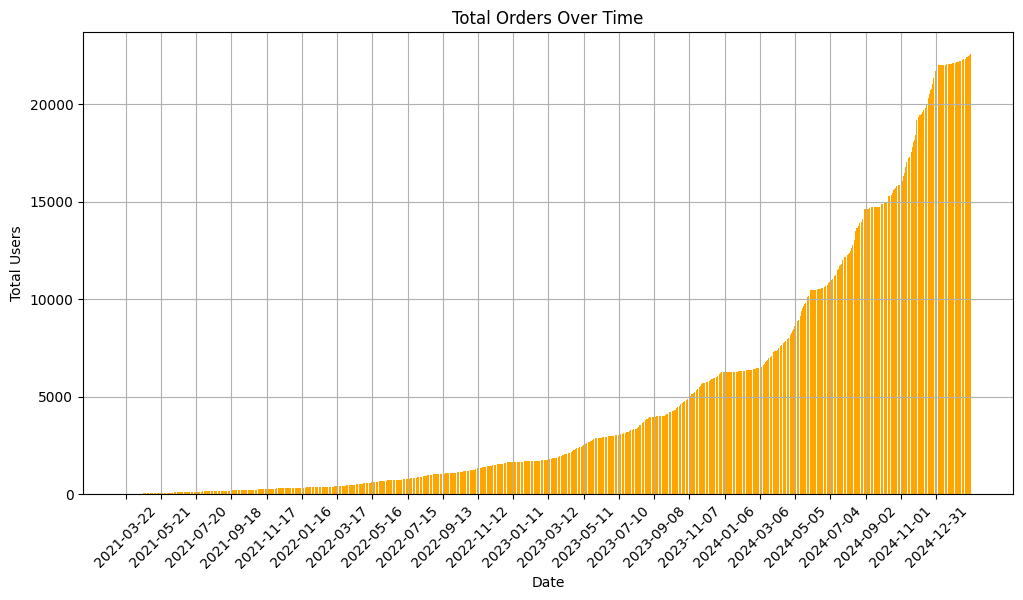

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime
import math

np.random.seed(42)

total_days = 1440 # 4 years
season_length = 90 # 90 days
total_orders = 0

current_year = 0

spring_counter = 0
summer_counter = 0
fall_counter = 0
winter_counter = 0

multiplier = 90

total_orders_multiplier = 0.000001

# Generate dates from two years ago until today
start_date = datetime.datetime.today() - datetime.timedelta(days=total_days)
dates = [start_date + datetime.timedelta(days=i) for i in range(total_days)]

previous_year = dates[0].year

y_orders = np.zeros(total_days)
y_total = np.zeros(total_days)

# Generate total users by day
for i in range(total_days):
    increments = i * 0.1
    month = dates[i].month

    current_year = dates[i].year

    if current_year != previous_year:
        spring_counter = 0
        summer_counter = 0
        fall_counter = 0
        winter_counter = 0
        previous_year = current_year

    if month in [12, 1, 2]:  # Winter
        y_orders[i] = np.exp(winter_counter * 0.05) * 0.05 * multiplier * ((total_orders + 1) * total_orders_multiplier)  # Exponential Distribution
        winter_counter += 1
    elif 3 <= month <= 5:  # Spring
        y_orders[i] = np.log(spring_counter + 1) * multiplier * ((total_orders + 1) * total_orders_multiplier)  # Logarithm Distribution
        spring_counter += 1
    elif 6 <= month <= 8:  # Summer
        y_orders[i] = summer_counter * 0.05 * multiplier * ((total_orders + 1) * total_orders_multiplier)  # Linear Distribution
        summer_counter += 1
    else:  # Fall
        y_orders[i] = np.random.poisson(fall_counter * 0.05) * multiplier * (total_orders + 1) * total_orders_multiplier
        fall_counter += 1

    y_orders[i] = int(math.ceil(y_orders[i] + abs(np.random.normal(0, 20)) * y_orders[i]))  # Add noise
    total_orders += y_orders[i]
    y_total[i] = total_orders

# Plot
plt.figure(figsize=(12, 6))
plt.bar(dates, y_total, color='orange')
plt.title('Total Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Total Users')

# Format x-axis with readable date labels
plt.xticks(ticks=dates[::60], labels=[d.strftime('%Y-%m-%d') for d in dates[::60]], rotation=45)

plt.grid()
plt.show()


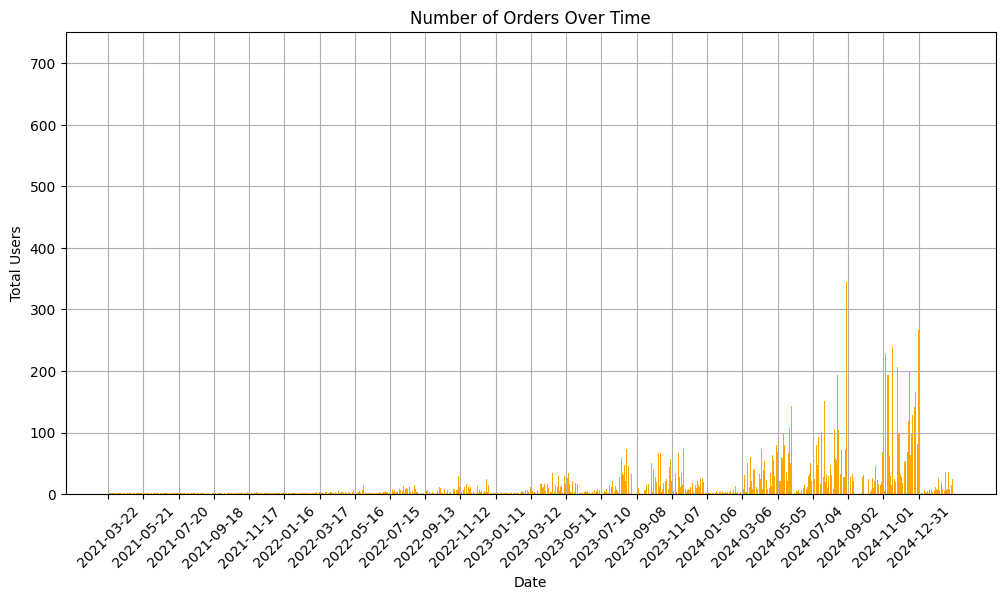

In [3]:
# Plot
plt.figure(figsize=(12, 6))
plt.bar(dates, y_orders, color='orange')
plt.title('Number of Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Total Users')

# Format x-axis with readable date labels
plt.xticks(ticks=dates[::60], labels=[d.strftime('%Y-%m-%d') for d in dates[::60]], rotation=45)

plt.grid()
plt.show()

### CSV generation of dates regarding orders in that date

In [5]:
import pandas as pd

# to csv
df = pd.DataFrame({'date': list(map(lambda full_date: full_date.date(), dates)), 'number_of_orders': y_orders})

print(df.head())

df.to_csv('./boxing_gloves_order_data/gloves_order_date_data.csv')

# dates_list = []

# Iterate through the DataFrame and repeat the age according to the number of users
# for index, row in df.iterrows():
#     dates_list.extend([row['date']] * int(row['number_of_orders']))

# max_size = 1000

# split_dates_list = [dates_list[i:i + max_size] for i in range(0, len(dates_list), max_size)]

# for i, sublist in enumerate(split_dates_list):
#     age_df = pd.DataFrame({ 'date': sublist })
#     age_df.to_csv(f'gloves_order_date_data_{i}.csv', index=False, header=False)

         date  number_of_orders
0  2021-03-14               0.0
1  2021-03-15               1.0
2  2021-03-16               1.0
3  2021-03-17               1.0
4  2021-03-18               1.0
